# Library

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_18/966480228.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

In [2]:
df = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
df

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

In [3]:
profile = ProfileReport(df, title ="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Perbandingan Kasus Covid-19 (Deaths/Recovered/Active) di Indonesia vs. US

In [4]:
indonesia_cases = df[df['Country/Region'] == 'Indonesia']
indonesia_cases

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
80      Indonesia     100303    4838      58173   37292       1525   

    New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
80          57           1518                4.82                   58.0   

    Deaths / 100 Recovered  Confirmed last week  1 week change  \
80                    8.32                88214          12089   

    1 week % increase       WHO Region  
80               13.7  South-East Asia

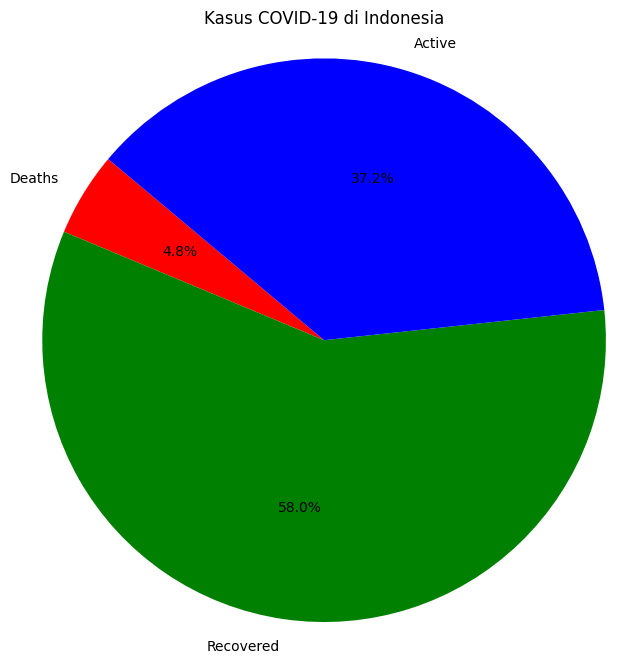

In [5]:
deaths = indonesia_cases['Deaths'].values[0]
recovered = indonesia_cases['Recovered'].values[0]
active = indonesia_cases['Active'].values[0]

# Data untuk di pie chart
labels = ['Deaths', 'Recovered', 'Active']
sizes = [deaths, recovered, active]
colors = ['red', 'green', 'blue']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Kasus COVID-19 di Indonesia')
plt.axis('equal')  # Buat bikin pie chart
plt.show()

Berdasarkan pie chart di atas diketahui bahwa 58% pasien yang terjangkit COVID-19 ketika data direkap sudah dapat sembuh. Sedangkan, 37.2% pasien masih dalam kondisi terjangkit, dan 4.8% pasien meninggal dunia.

In [6]:
us_cases = df[df['Country/Region'] == 'US']
us_cases

Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                   30.9   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16              3834677         455582   

     1 week % increase WHO Region  
173              11.88   Americas

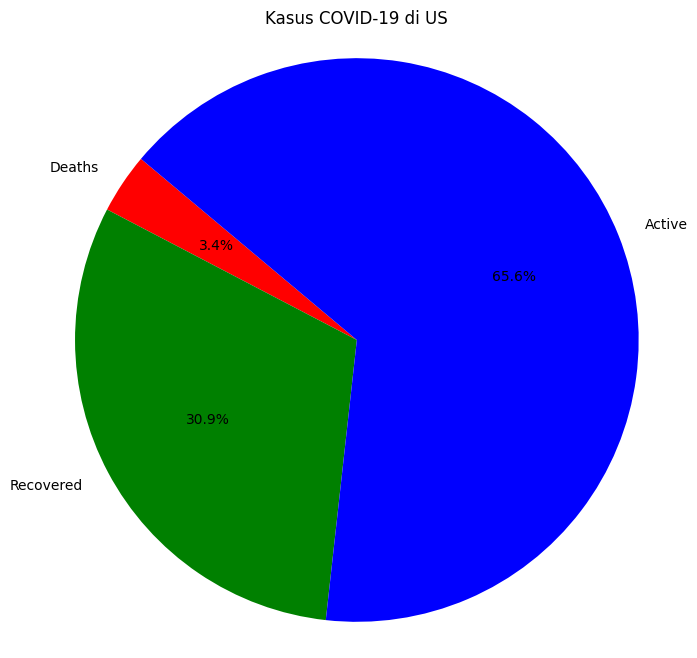

In [7]:
deaths = us_cases['Deaths'].values[0]
recovered = us_cases['Recovered'].values[0]
active = us_cases['Active'].values[0]

# Data untuk di pie chart
labels = ['Deaths', 'Recovered', 'Active']
sizes = [deaths, recovered, active]
colors = ['red', 'green', 'blue']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Kasus COVID-19 di US')
plt.axis('equal')  # Buat bikin pie chart
plt.show()

Berdasarkan pie chart di atas diketahui bahwa 30.9% pasien yang terjangkit COVID-19 ketika data direkap sudah dapat sembuh. Sedangkan, 65.6% pasien masih dalam kondisi terjangkit, dan 3.4% pasien meninggal dunia.

# Perbandingan Antar Asia Tenggara

In [8]:
south_east_asia_data = df[df['WHO Region'] == 'South-East Asia']
south_east_asia_data

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
13      Bangladesh     226225    2965     125683   97577       2772   
19          Bhutan         99       0         86      13          4   
27           Burma        350       6        292      52          0   
79           India    1480073   33408     951166  495499      44457   
80       Indonesia     100303    4838      58173   37292       1525   
106       Maldives       3369      15       2547     807         67   
119          Nepal      18752      48      13754    4950        139   
158      Sri Lanka       2805      11       2121     673         23   
167       Thailand       3297      58       3111     128          6   
168    Timor-Leste         24       0          0      24          0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
13           37           1801                1.31                  55.56   
19            0              1                0.00                  86.87   
27            0              2                1.71                  83.43   
79          637          33598                2.26                  64.26   
80           57           1518                4.82                  58.00   
106           0             19                0.45                  75.60   
119           3            626                0.26                  73.35   
158           0             15                0.39                  75.61   
167           0              2                1.76                  94.36   
168           0              0                0.00                   0.00   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
13                     2.36               207453          18772   
19                     0.00                   90              9   
27                     2.05                  341              9   
79                     3.51              1155338         324735   
80                     8.32                88214          12089   
106                    0.59                 2999            370   
119                    0.35                17844            908   
158                    0.52                 2730             75   
167                    1.86                 3250             47   
168                    0.00                   24              0   

     1 week % increase       WHO Region  
13                9.05  South-East Asia  
19               10.00  South-East Asia  
27                2.64  South-East Asia  
79               28.11  South-East Asia  
80               13.70  South-East Asia  
106              12.34  South-East Asia  
119               5.09  South-East Asia  
158               2.75  South-East Asia  
167               1.45  South-East Asia  
168               0.00  South-East Asia

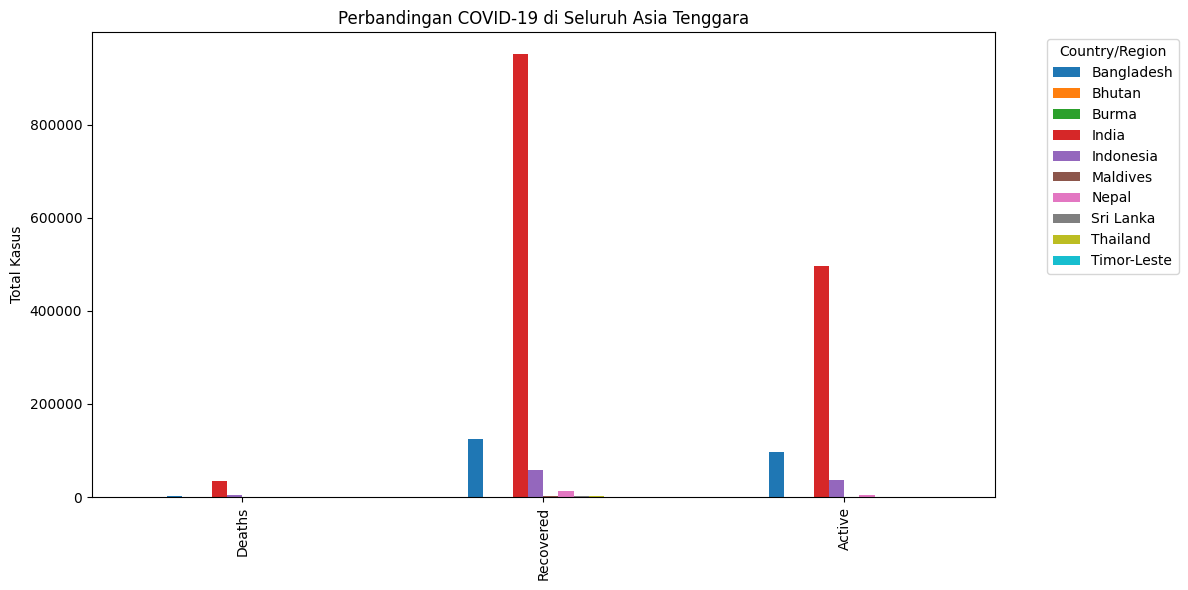

In [9]:
columns_to_compare = ['Deaths', 'Recovered', 'Active']
grouped_data = south_east_asia_data.groupby('Country/Region')[columns_to_compare].sum()
transposed_data = grouped_data.transpose() # Transpose data
transposed_data.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Total Kasus')
plt.title('Perbandingan COVID-19 di Seluruh Asia Tenggara')
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()